Notebook for 2.) Annotation Quality 1st a.) and b.)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
# Path to the .npz file
DATASET_PATH = "../../MLPC2025_dataset"

ANNOTATIONS_PATH = DATASET_PATH + "/annotations.csv"
ANNOTATIONS_TEXT_EMBEDDINGS_PATH = DATASET_PATH + "/annotations_text_embeddings.npz"

metadata_path = DATASET_PATH + "/metadata.csv"
METADATA_TITLE_EMBEDDINGS_PATH = DATASET_PATH + "/metadata_title_embeddings.npz"
METADATA_KEYWORDS_EMBEDDINGS_PATH = DATASET_PATH + "/metadata_keywords_embeddings.npz"

AUDIO_PATHS = DATASET_PATH + "/audio"
AUDIO_FEATURES_PATHS = DATASET_PATH + "/audio_features"

In [3]:
annotations = pd.read_csv(ANNOTATIONS_PATH)
annotations.head()

,task_id,filename,annotator,text,onset,offset,filename_unsafe
0,161977861,560761.mp3,5945971035380930099053858595454362549806990533...,bird twitters nearby with a high pitch two times,16.552368,17.271435,560761_tufted titmouse calling.mp3
1,161987165,240538.mp3,4916274343929406460752597829190197300566135449...,A cow bell clinging repeatedly,12.265866,15.420303,240538_AMB - Cowbell stable Stereowav.mp3
2,161989998,660337.mp3,8960534646813062318784592632173589349806817458...,A child speaks with a high-pitched voice,12.493984,13.315680,660337_Aeroplane Takeoff From Cabinwav.mp3
3,161978339,725686.mp3,4540509031938851510799116530500792274849113758...,A high pitch meowing coming from a cat,16.018221,16.991704,725686_Black Cat Talking.mp3
4,161985729,97606.mp3,1085174475307080254018414698413953957857995126...,An extremely loud brushing sound on a construc...,0.000000,1.626352,97606_jackhammer med distwav.mp3


In [4]:
# Remove unnecessary columns for this task
annotations = annotations.drop(columns=['task_id', 'filename_unsafe'])
annotations['original_index'] = annotations.index
annotations.head()

,filename,annotator,text,onset,offset,original_index
0,560761.mp3,5945971035380930099053858595454362549806990533...,bird twitters nearby with a high pitch two times,16.552368,17.271435,0
1,240538.mp3,4916274343929406460752597829190197300566135449...,A cow bell clinging repeatedly,12.265866,15.420303,1
2,660337.mp3,8960534646813062318784592632173589349806817458...,A child speaks with a high-pitched voice,12.493984,13.315680,2
3,725686.mp3,4540509031938851510799116530500792274849113758...,A high pitch meowing coming from a cat,16.018221,16.991704,3
4,97606.mp3,1085174475307080254018414698413953957857995126...,An extremely loud brushing sound on a construc...,0.000000,1.626352,4


In [5]:
metadata = pd.read_csv(metadata_path)
metadata.head()

,filename,keywords,freesound_id,sound_link,manufacturer,license,title,description,num_downloads,geotag,start_time_s,end_time_s
0,617030.mp3,"atmosphere, general-noise, suburban, ambiance,...",617030,https://freesound.org/people/klankbeeld/sounds...,klankbeeld,https://creativecommons.org/licenses/by/4.0/,suburb night NL 1041PM 210415_0279.wav,Night in a suburban city. All sounds far. Tra...,65,51.7090740261 5.30657821347,15.6,43.535
1,637408.mp3,"jackhammer, construction, reflected",637408,https://freesound.org/people/kyles/sounds/637408/,kyles,http://creativecommons.org/publicdomain/zero/1.0/,construction jackhammer reflected5.flac,construction jackhammer reflected5\n\nrecorded...,23,NaN,209.8,232.356
2,615545.mp3,"river-side, field-recording, bell, fields, vil...",615545,https://freesound.org/people/klankbeeld/sounds...,klankbeeld,https://creativecommons.org/licenses/by/4.0/,4 church-bells 7AM at river NL 210718_0304.wav,Four differed church bells tell it is 7 o’cloc...,227,51.7405127581 5.23133654974,6.0,31.666
3,410867.mp3,"sports-crowd, applause, crowd, crowd-cheer, Ad...",410867,https://freesound.org/people/NobodyYouKnowOf/s...,NobodyYouKnowOf,http://creativecommons.org/publicdomain/zero/1.0/,crowd_the_hill_language.wav,Crowd making some noise at a SANFL Aussie rule...,308,-34.9157073897 138.596134186,19.8,48.569
4,65916.mp3,"bones, breaking, broken, chime, clatter, explo...",65916,https://freesound.org/people/BristolStories/so...,BristolStories,http://creativecommons.org/licenses/by-nc/3.0/,shells-tinkle.WAV,This is a shells wind chime. I used it for the...,7721,NaN,23.6,40.797


In [6]:
# Remove unnecessary columns for this task
metadata = metadata.drop(columns=['freesound_id', 'sound_link', 'manufacturer', 'license', 'num_downloads', 'geotag', 'start_time_s', 'end_time_s'])
metadata.head()

,filename,keywords,title,description
0,617030.mp3,"atmosphere, general-noise, suburban, ambiance,...",suburb night NL 1041PM 210415_0279.wav,Night in a suburban city. All sounds far. Tra...
1,637408.mp3,"jackhammer, construction, reflected",construction jackhammer reflected5.flac,construction jackhammer reflected5\n\nrecorded...
2,615545.mp3,"river-side, field-recording, bell, fields, vil...",4 church-bells 7AM at river NL 210718_0304.wav,Four differed church bells tell it is 7 o’cloc...
3,410867.mp3,"sports-crowd, applause, crowd, crowd-cheer, Ad...",crowd_the_hill_language.wav,Crowd making some noise at a SANFL Aussie rule...
4,65916.mp3,"bones, breaking, broken, chime, clatter, explo...",shells-tinkle.WAV,This is a shells wind chime. I used it for the...


In [7]:
metadata_title_embeddings = np.load(METADATA_TITLE_EMBEDDINGS_PATH)['embeddings']
metadata_keywords_embeddings = np.load(METADATA_KEYWORDS_EMBEDDINGS_PATH)['embeddings']

annotations_text_embeddings = np.load(ANNOTATIONS_TEXT_EMBEDDINGS_PATH)['embeddings']

EMBEDDING_SIZE = metadata_title_embeddings.shape[1]

In [8]:
# Get list of filenames of files with multiple annotators
files_with_multiple_annotators = annotations.groupby('filename')['annotator'].nunique()
files_with_multiple_annotators = files_with_multiple_annotators[files_with_multiple_annotators > 1]

files_per_annotator_count = [(num_annotators, num_files) for num_annotators, num_files in files_with_multiple_annotators.value_counts().items()]

files_with_multiple_annotators = files_with_multiple_annotators.index.tolist()
print(f"Number of files with multiple annotators: {len(files_with_multiple_annotators)}\n")

for num_annotators, num_files in files_per_annotator_count:
    print(f"Number of files with {num_annotators} annotators: {num_files}")

Number of files with multiple annotators: 731

Number of files with 2 annotators: 725
Number of files with 3 annotators: 6


In [9]:
# Get annotations for these files and group by filename and annotator
annotations_for_files_with_multiple_annotators = annotations[annotations['filename'].isin(files_with_multiple_annotators)]
annotations_for_files_with_multiple_annotators = annotations_for_files_with_multiple_annotators.groupby(['filename', 'annotator']).agg(lambda x: list(x)).reset_index()

print(f"Total annotations for all files with multiple annotators: {annotations_for_files_with_multiple_annotators.apply(len).sum()}")

annotations_for_files_with_multiple_annotators.head()

Total annotations for all files with multiple annotators: 8808


,filename,annotator,text,onset,offset,original_index
0,102431.mp3,2825101440002704998553785231562509406931203443...,"[Baby crying, repeatedly, natural, indoors, ne...",[0.0114572603469813],[26.225668934240364],[15463]
1,102431.mp3,7505829110384075687331616965056441784304296723...,[Baby making mid-pitched unrhythmic non-crying...,"[19.64850354487787, 3.423445707396883, 17.3247...","[23.590653147334883, 5.705742845661471, 18.735...","[7568, 12072, 16641, 17965, 18846, 19487, 2683..."
2,102744.mp3,1145579747015607221221744067969991550764671773...,[Military person speaking clearly and distinct...,"[8.950486825865145, 20.62503485960229, 14.5153...","[14.398609241609147, 24.61383877112915, 18.173...","[1679, 5193, 17562, 23710, 31903, 32066, 32482..."
3,102744.mp3,9467928724851080650561981608771911260861986192...,[Calm mature male voice telling coordinates an...,"[8.913459964072208, 0.1083703339096925]","[29.043249487797592, 8.642534129297978]","[3022, 4952]"
4,106035.mp3,3816674505249688706999437810769297529658534646...,[Segments of a sound made by an electric guit...,[0.0245156386576965],[26.329795918367346],[32103]


In [10]:
same_annotations_per_file = {}
for filename in annotations_for_files_with_multiple_annotators['filename'].unique():

    file_annotations = annotations_for_files_with_multiple_annotators[annotations_for_files_with_multiple_annotators['filename'] == filename]

    # Get annotation times for each annotator
    file_annotation_times = []
    for annotator in file_annotations['annotator'].unique():

        annotator_onsets = file_annotations[file_annotations['annotator'] == annotator]['onset'].values[0]
        annotator_offsets = file_annotations[file_annotations['annotator'] == annotator]['offset'].values[0]
        annotator_original_indices = file_annotations[file_annotations['annotator'] == annotator]['original_index'].values[0]

        file_annotation_times.append([(onset, offset, idx) for onset, offset, idx in zip(annotator_onsets, annotator_offsets, annotator_original_indices)])

    n_annotators = len(file_annotation_times)

    # Loop through annotators
    for a1 in range(n_annotators):
        annotation_times_1 = file_annotation_times[a1]
        for a2 in range(a1 + 1, n_annotators):
            annotation_times_2 = file_annotation_times[a2]

            # Loop through individual annotation times
            for annotation_time_1 in annotation_times_1:
                for annotation_time_2 in annotation_times_2:

                    onset_1, offset_1, idx_1 = annotation_time_1
                    onset_2, offset_2, idx_2 = annotation_time_2

                    # Check if they have the same onset/offset (with small lean way)
                    # If yes -> same region
                    threshold = 0.5
                    if np.abs(onset_1 - onset_2) < threshold and np.abs(offset_1 - offset_2) < threshold:

                        embedding_1 = annotations_text_embeddings[idx_1]
                        embedding_2 = annotations_text_embeddings[idx_2]
                        similarity = np.dot(embedding_1, embedding_2)/(np.linalg.norm(embedding_1) * np.linalg.norm(embedding_2))

                        # In case the dictionary entry does not exist -> create it
                        try:
                            same_annotations_per_file[filename].append((annotation_time_1, annotation_time_2, similarity))
                        except KeyError:
                            same_annotations_per_file[filename] = [(annotation_time_1, annotation_time_2, similarity)]

print("Check if everything works correctly:\n")
print(same_annotations_per_file[list(same_annotations_per_file.keys())[0]])

Check if everything works correctly:

[((0.0245156386576965, 26.329795918367346, 32103), (0.0, 26.329795918367346, 18116), np.float32(0.46029824))]


In [11]:
same_annotation_differences_per_file = same_annotations_per_file
text_similarities = []

for filename in same_annotations_per_file.keys():

    same_annotations = same_annotations_per_file[filename]

    onset_diffs = []
    offset_diffs = []
    duration_diffs = []

    for same_annotation in same_annotations:
        annotation_1, annotation_2, sim = same_annotation

        text_similarities.append(sim)

        onset_1, offset_1, _ = annotation_1
        onset_2, offset_2, _ = annotation_2

        onset_diffs.append(np.abs(onset_1 - onset_2))
        offset_diffs.append(np.abs(offset_1 - offset_2))
        duration_diffs.append(np.abs((offset_1 - onset_1) - (offset_2 - onset_2)))

    same_annotation_differences_per_file[filename] = {'onset': onset_diffs, 'offset': offset_diffs, 'duration_diff': duration_diffs}

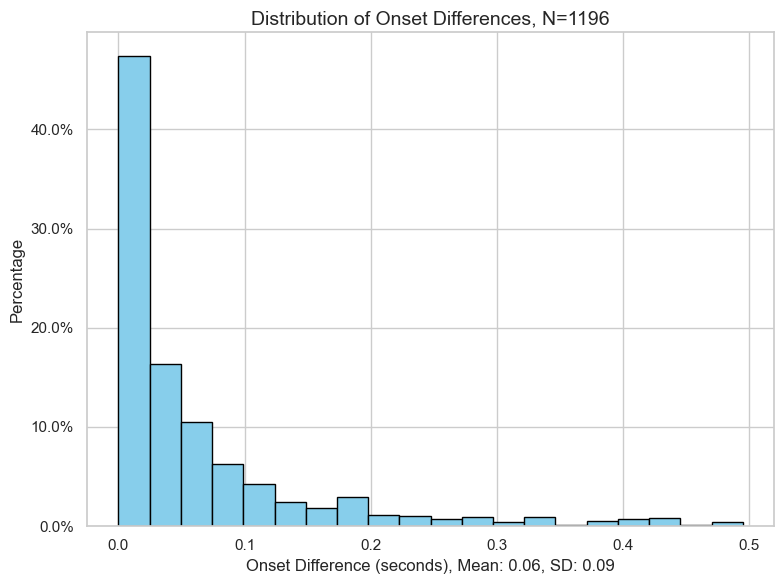

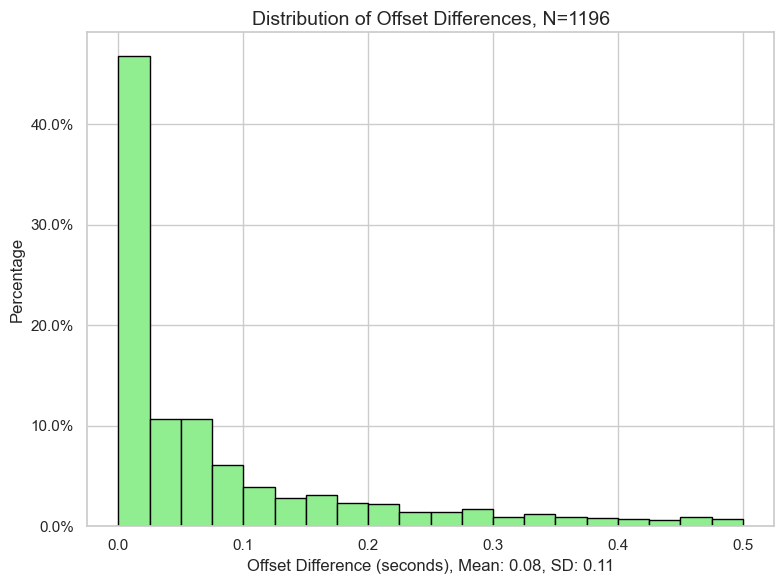

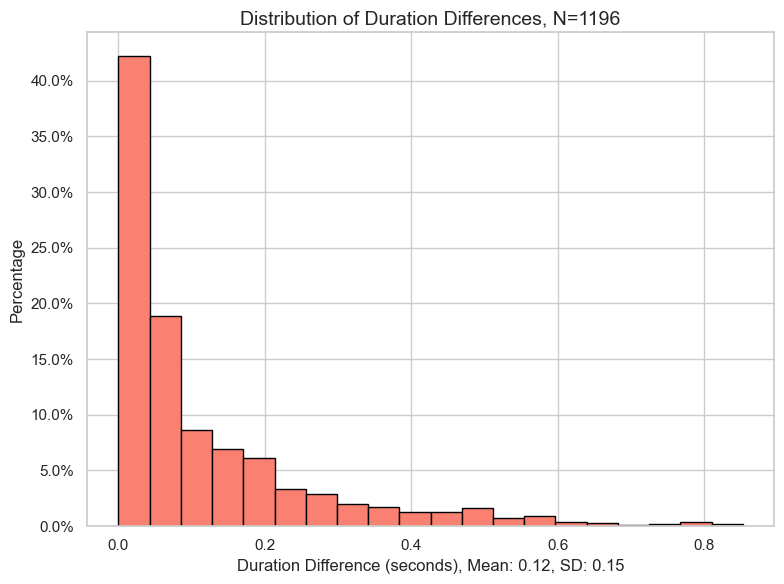

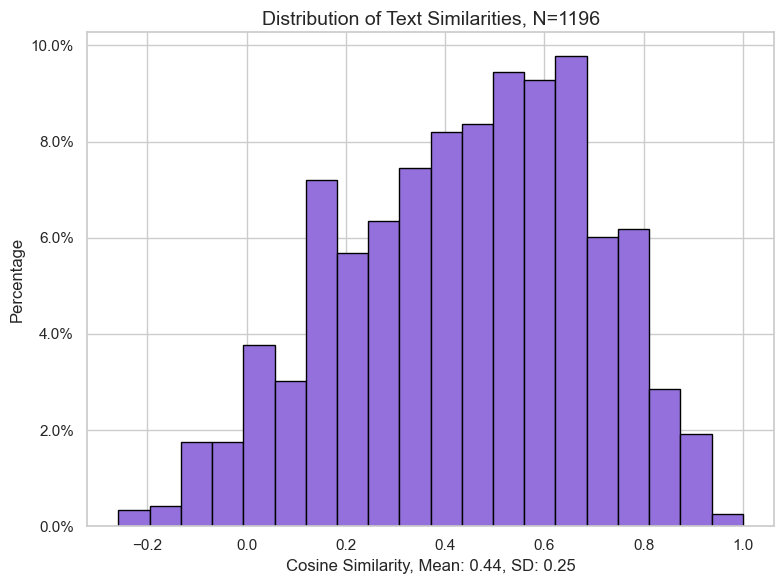

In [12]:
onset_diffs = []
offset_diffs = []
duration_diffs = []

for diffs in same_annotation_differences_per_file.values():
    onset_diffs.extend(diffs['onset'])
    offset_diffs.extend(diffs['offset'])
    duration_diffs.extend(diffs['duration_diff'])

# Set a nicer style using seaborn
sns.set(style="whitegrid")

# Calculate statistics
onset_mean, onset_sd = np.mean(onset_diffs), np.std(onset_diffs)
offset_mean, offset_sd = np.mean(offset_diffs), np.std(offset_diffs)
duration_mean, duration_sd = np.mean(duration_diffs), np.std(duration_diffs)
text_sim_mean, text_sim_sd = np.mean(text_similarities), np.std(text_similarities)

# Plot onset differences
plt.figure(figsize=(8, 6))
plt.hist(onset_diffs, bins=20, color='skyblue', edgecolor='black', weights=np.ones(len(onset_diffs)) / len(onset_diffs))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title(f"Distribution of Onset Differences, N={len(onset_diffs)}", fontsize=14)
plt.xlabel(f"Onset Difference (seconds), Mean: {onset_mean:.2f}, SD: {onset_sd:.2f}", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.tight_layout()
plt.show()

# Plot offset differences
plt.figure(figsize=(8, 6))
plt.hist(offset_diffs, bins=20, color='lightgreen', edgecolor='black', weights=np.ones(len(offset_diffs)) / len(offset_diffs))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title(f"Distribution of Offset Differences, N={len(offset_diffs)}", fontsize=14)
plt.xlabel(f"Offset Difference (seconds), Mean: {offset_mean:.2f}, SD: {offset_sd:.2f}", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.tight_layout()
plt.show()

# Plot duration differences
plt.figure(figsize=(8, 6))
plt.hist(duration_diffs, bins=20, color='salmon', edgecolor='black', weights=np.ones(len(duration_diffs)) / len(duration_diffs))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title(f"Distribution of Duration Differences, N={len(duration_diffs)}", fontsize=14)
plt.xlabel(f"Duration Difference (seconds), Mean: {duration_mean:.2f}, SD: {duration_sd:.2f}", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.tight_layout()
plt.show()

# Plot text similarities
plt.figure(figsize=(8, 6))
plt.hist(text_similarities, bins=20, color='mediumpurple', edgecolor='black', weights=np.ones(len(text_similarities)) / len(text_similarities))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title(f"Distribution of Text Similarities, N={len(text_similarities)}", fontsize=14)
plt.xlabel(f"Cosine Similarity, Mean: {text_sim_mean:.2f}, SD: {text_sim_sd:.2f}", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.tight_layout()
plt.show()